In [1]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import seaborn as sns

In [2]:
# Mounting google drive in colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
# Loading a Dataset from the Google Drive to Google Colab
df = pd.read_excel('/content/drive/MyDrive/NHS-Admissions.xls')
df.head()

,Year,Month,Day,Specialty Code,Specialty Name,Decisions to Admit,Admissions,Failed to Attend,Removals,Deferred admissions,Patients Suspended,GP Referrals Made,Other Referrals Made,First Attendances Seen,First Attendances DNA,Subsequent Attendances Seen,Subsequent Attendances DNA
0,2008,6,1,C_999,Total,1182425,1063433,23595,157446,43986,44532,2655581.000,1.462796e+06,3661937,343937,7854773,1000206
1,2008,9,1,C_999,Total,1199964,1087367,25920,156115,45368,42254,2643823.264,1.463597e+06,3731940,365462,7883778,1017999
2,2008,12,1,C_999,Total,1217895,1094776,25081,164242,50124,52006,2552289.424,1.470639e+06,3775186,368552,7969423,1021504
3,2008,3,1,C_999,Total,1229108,1116562,25313,163881,43875,38526,2716094.000,1.512271e+06,3784347,352345,8100045,1051220
4,2009,6,1,C_999,Total,1250250,1105491,24984,159466,42671,43105,2808565.000,1.560909e+06,3945308,367391,8195380,1007916


In [8]:
df.head()

,Year,Month,Day,Specialty Code,Specialty Name,Decisions to Admit,Admissions,Failed to Attend,Removals,Deferred admissions,Patients Suspended,GP Referrals Made,Other Referrals Made,First Attendances Seen,First Attendances DNA,Subsequent Attendances Seen,Subsequent Attendances DNA
0,2008,6,1,C_999,Total,1182425,1063433,23595,157446,43986,44532,2655581.000,1.462796e+06,3661937,343937,7854773,1000206
1,2008,9,1,C_999,Total,1199964,1087367,25920,156115,45368,42254,2643823.264,1.463597e+06,3731940,365462,7883778,1017999
2,2008,12,1,C_999,Total,1217895,1094776,25081,164242,50124,52006,2552289.424,1.470639e+06,3775186,368552,7969423,1021504
3,2008,3,1,C_999,Total,1229108,1116562,25313,163881,43875,38526,2716094.000,1.512271e+06,3784347,352345,8100045,1051220
4,2009,6,1,C_999,Total,1250250,1105491,24984,159466,42671,43105,2808565.000,1.560909e+06,3945308,367391,8195380,1007916


In [9]:
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], errors = 'coerce')
df.head()

,Year,Month,Day,Specialty Code,Specialty Name,Decisions to Admit,Admissions,Failed to Attend,Removals,Deferred admissions,Patients Suspended,GP Referrals Made,Other Referrals Made,First Attendances Seen,First Attendances DNA,Subsequent Attendances Seen,Subsequent Attendances DNA,date
0,2008,6,1,C_999,Total,1182425,1063433,23595,157446,43986,44532,2655581.000,1.462796e+06,3661937,343937,7854773,1000206,2008-06-01
1,2008,9,1,C_999,Total,1199964,1087367,25920,156115,45368,42254,2643823.264,1.463597e+06,3731940,365462,7883778,1017999,2008-09-01
2,2008,12,1,C_999,Total,1217895,1094776,25081,164242,50124,52006,2552289.424,1.470639e+06,3775186,368552,7969423,1021504,2008-12-01
3,2008,3,1,C_999,Total,1229108,1116562,25313,163881,43875,38526,2716094.000,1.512271e+06,3784347,352345,8100045,1051220,2008-03-01
4,2009,6,1,C_999,Total,1250250,1105491,24984,159466,42671,43105,2808565.000,1.560909e+06,3945308,367391,8195380,1007916,2009-06-01


In [10]:
df=df.sort_values(by = 'date', ascending = True)

In [11]:
df.shape

(48, 18)

In [12]:
df.dtypes

Year                                    int64
Month                                   int64
Day                                     int64
Specialty Code                         object
Specialty Name                         object
Decisions to Admit                      int64
Admissions                              int64
Failed to Attend                        int64
Removals                                int64
Deferred admissions                    object
Patients Suspended                     object
GP Referrals Made                     float64
Other Referrals Made                  float64
First Attendances Seen                  int64
First Attendances DNA                   int64
Subsequent Attendances Seen             int64
Subsequent Attendances DNA              int64
date                           datetime64[ns]
dtype: object

In [13]:
df.isnull().sum()

Year                           0
Month                          0
Day                            0
Specialty Code                 0
Specialty Name                 0
Decisions to Admit             0
Admissions                     0
Failed to Attend               0
Removals                       0
Deferred admissions            0
Patients Suspended             0
GP Referrals Made              0
Other Referrals Made           0
First Attendances Seen         0
First Attendances DNA          0
Subsequent Attendances Seen    0
Subsequent Attendances DNA     0
date                           0
dtype: int64

In [14]:
(df == 0).sum()

Year                            0
Month                           0
Day                             0
Specialty Code                  0
Specialty Name                  0
Decisions to Admit              0
Admissions                      0
Failed to Attend                0
Removals                        0
Deferred admissions            39
Patients Suspended             39
GP Referrals Made               0
Other Referrals Made            0
First Attendances Seen          0
First Attendances DNA           0
Subsequent Attendances Seen     0
Subsequent Attendances DNA      0
date                            0
dtype: int64

In [15]:
dt= df.drop(['Patients Suspended ','Deferred admissions'], axis = 1)  #Caere of the secret space after Suspender!

In [16]:
(dt == 0).sum()

Year                           0
Month                          0
Day                            0
Specialty Code                 0
Specialty Name                 0
Decisions to Admit             0
Admissions                     0
Failed to Attend               0
Removals                       0
GP Referrals Made              0
Other Referrals Made           0
First Attendances Seen         0
First Attendances DNA          0
Subsequent Attendances Seen    0
Subsequent Attendances DNA     0
date                           0
dtype: int64

In [17]:
df['Admissions'].describe()

count    4.800000e+01
mean     1.331726e+06
std      1.274778e+05
min      1.063433e+06
25%      1.254063e+06
50%      1.353638e+06
75%      1.443568e+06
max      1.493892e+06
Name: Admissions, dtype: float64

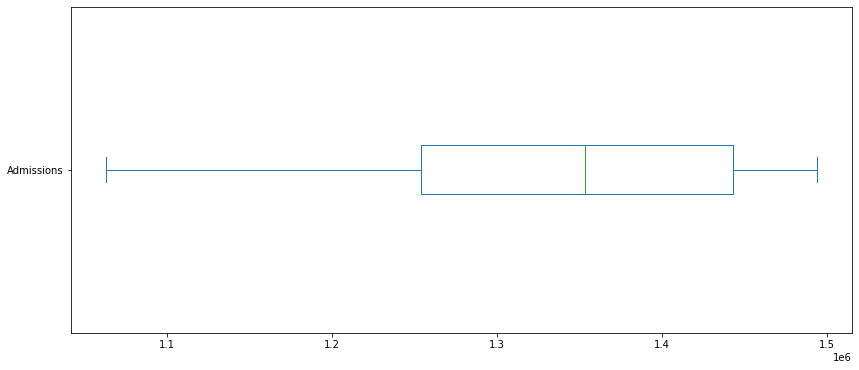

In [18]:
df['Admissions'].plot(kind='box', vert=False, figsize=(14,6))

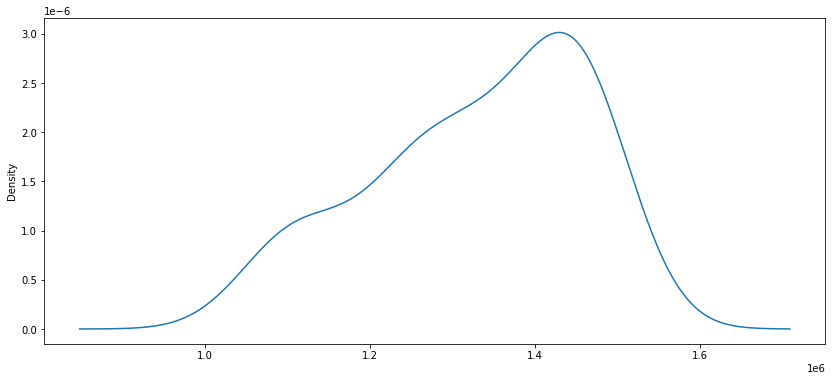

In [19]:
df['Admissions'].plot(kind='density', figsize=(14,6))

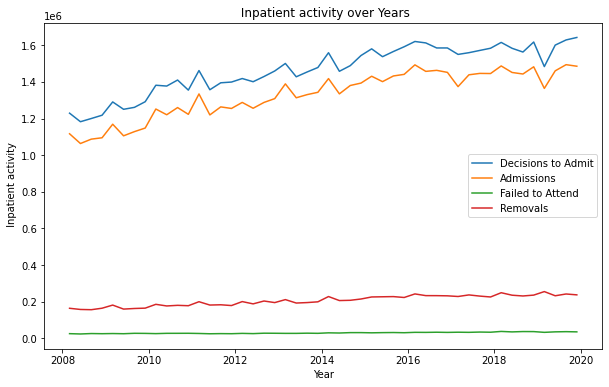

In [20]:
plt.plot(df["date"], df["Decisions to Admit"], label="Decisions to Admit")
plt.plot(df["date"], df["Admissions"], label="Admissions")
plt.plot(df["date"], df["Failed to Attend"], label="Failed to Attend")
plt.plot(df["date"], df["Removals"], label="Removals")
plt.title(" Inpatient activity over Years")
plt.xlabel("Year")
plt.ylabel(" Inpatient activity")
plt.legend()

plt.show()

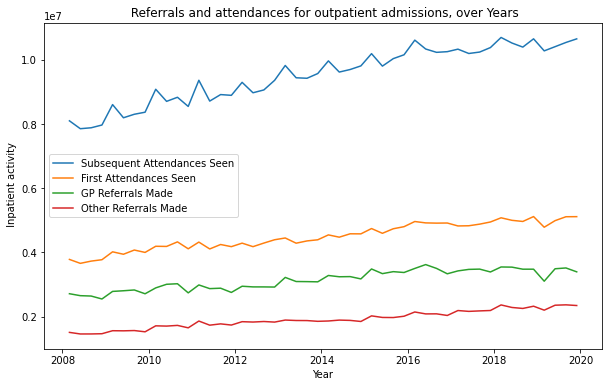

In [21]:
plt.plot(df["date"], df["Subsequent Attendances Seen"], label="Subsequent Attendances Seen")
plt.plot(df["date"], df["First Attendances Seen"], label="First Attendances Seen")
plt.plot(df["date"], df["GP Referrals Made"], label="GP Referrals Made")
plt.plot(df["date"], df["Other Referrals Made"], label="Other Referrals Made")
plt.title(" Referrals and attendances for outpatient admissions, over Years")
plt.xlabel("Year")
plt.ylabel(" Inpatient activity")
plt.legend()

plt.show()

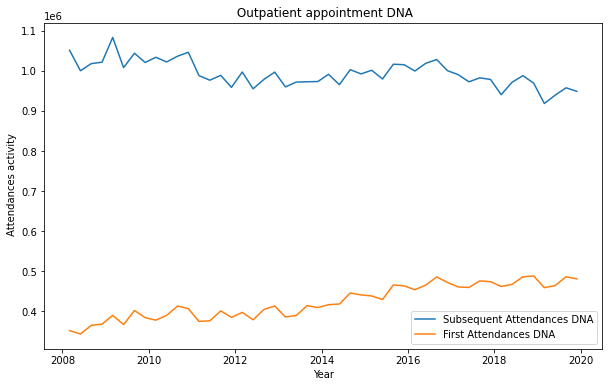

In [22]:
plt.plot(df["date"], df["Subsequent Attendances DNA"], label="Subsequent Attendances DNA")
plt.plot(df["date"], df["First Attendances DNA"], label="First Attendances DNA")
plt.title(" Outpatient appointment DNA")
plt.xlabel("Year")
plt.ylabel(" Attendances activity")
plt.legend()

plt.show()

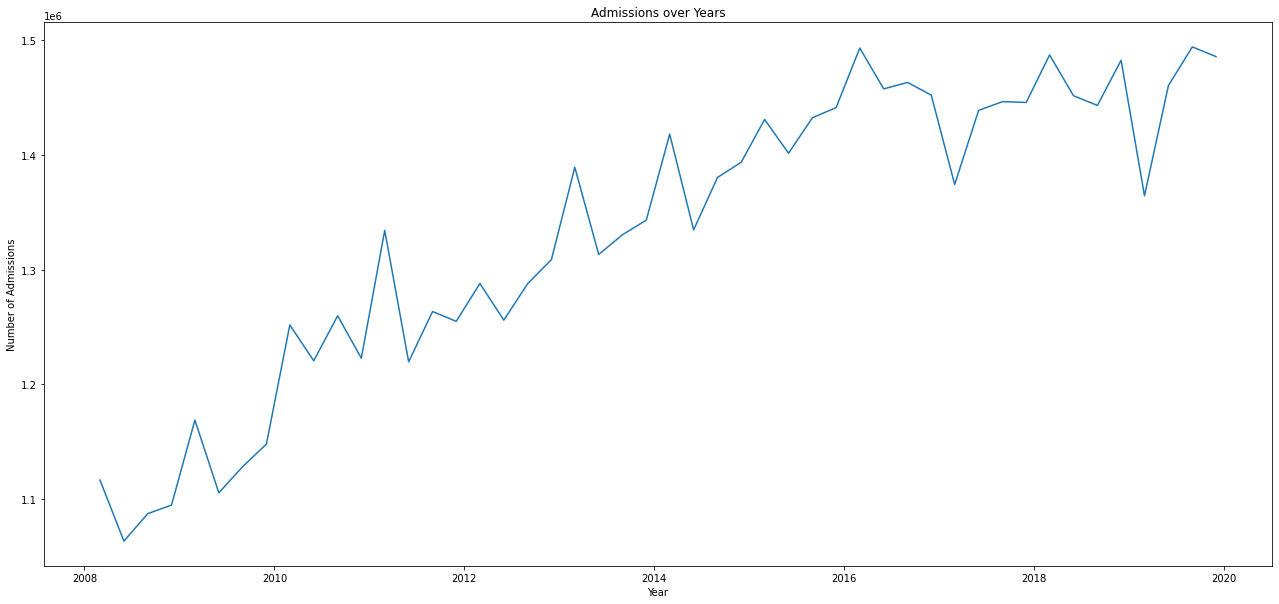

In [23]:
plt.figure(figsize=(22,10))
plt.plot(df["date"],df["Admissions"])
plt.title("Admissions over Years")
plt.xlabel("Year")
plt.ylabel("Number of Admissions")
plt.show()

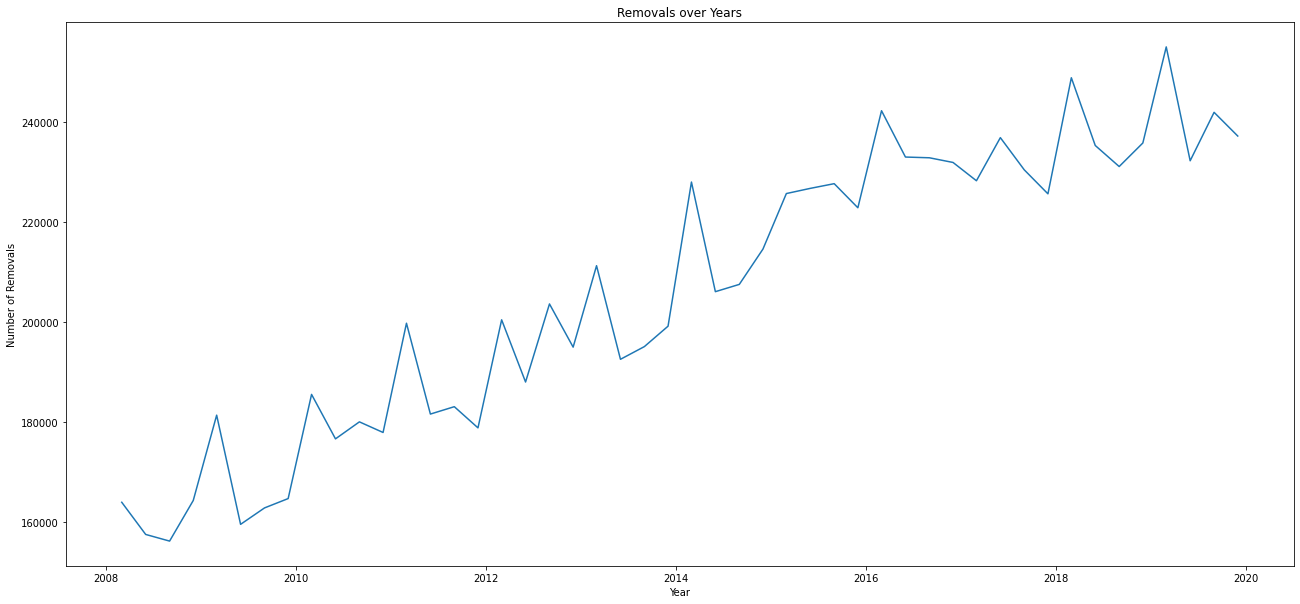

In [24]:
plt.figure(figsize=(22,10))
plt.plot(df["date"],df["Removals"])
plt.title("Removals over Years")
plt.xlabel("Year")
plt.ylabel("Number of Removals")
plt.show()

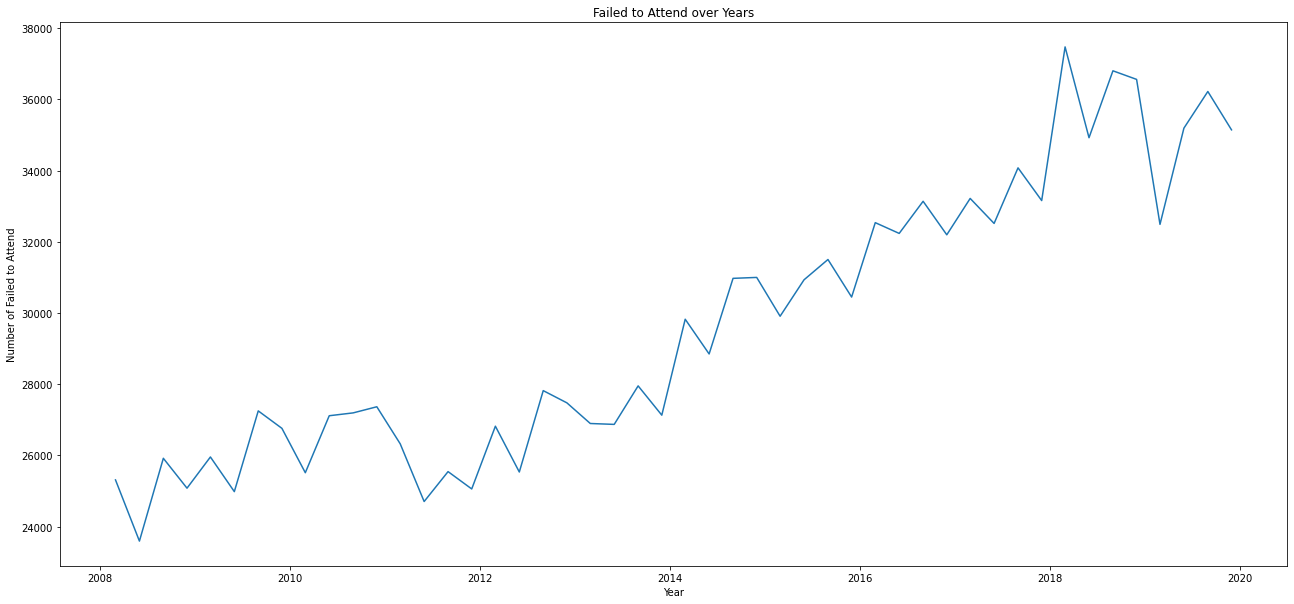

In [25]:
plt.figure(figsize=(22,10))
plt.plot(df["date"],df["Failed to Attend"])
plt.title("Failed to Attend over Years")
plt.xlabel("Year")
plt.ylabel("Number of Failed to Attend")
plt.show()

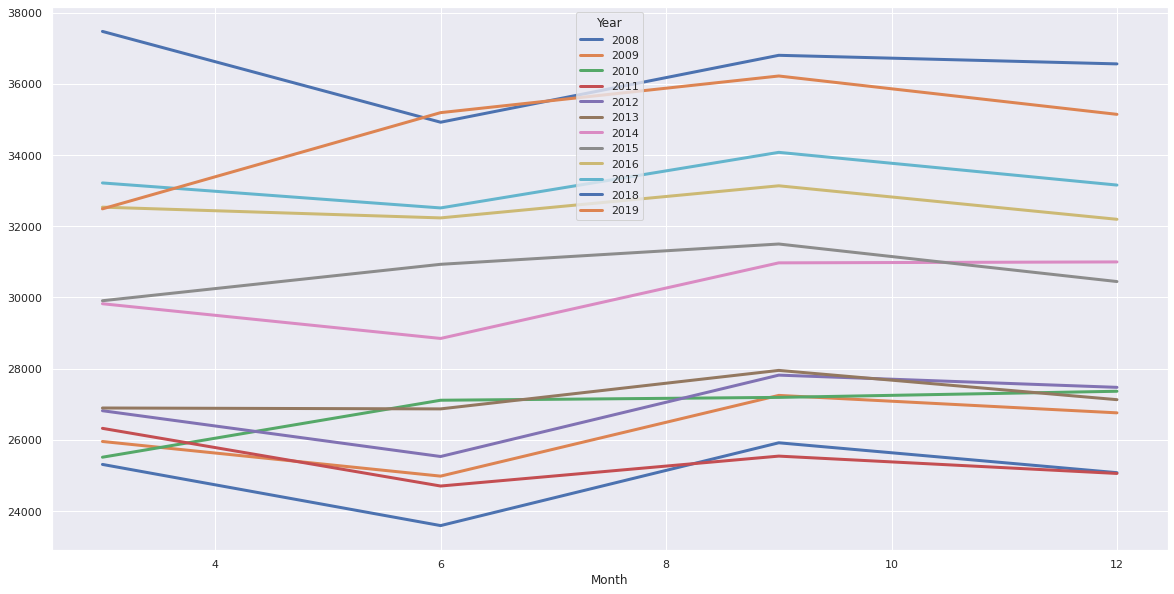

In [26]:
sns.set()
season = df

spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'Failed to Attend', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()

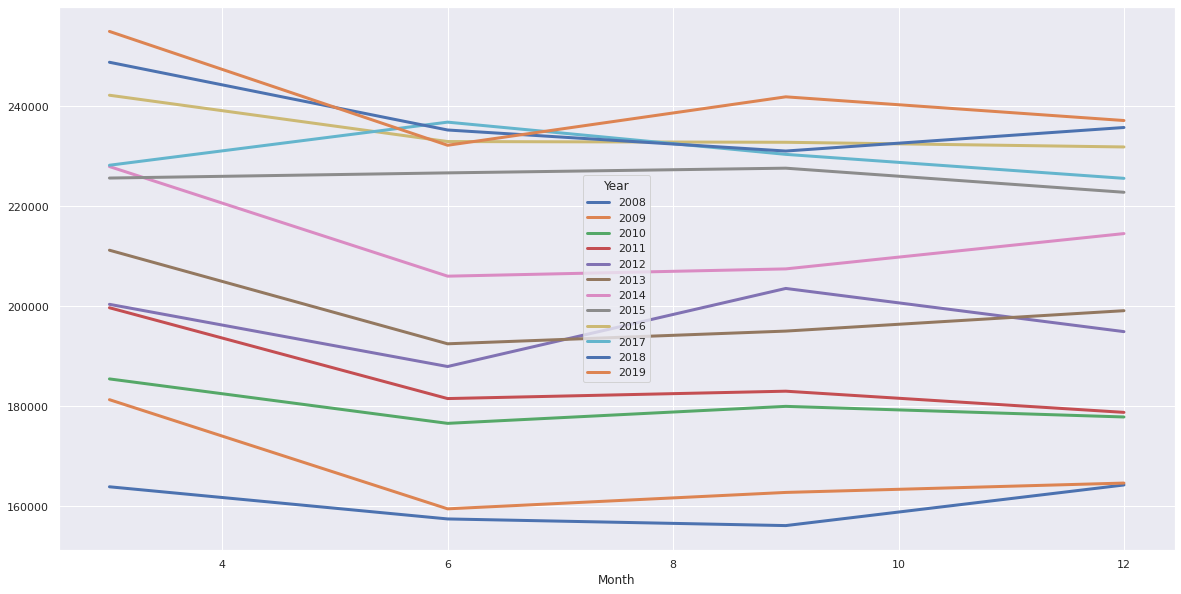

In [27]:
sns.set()
season = df

spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'Removals', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()

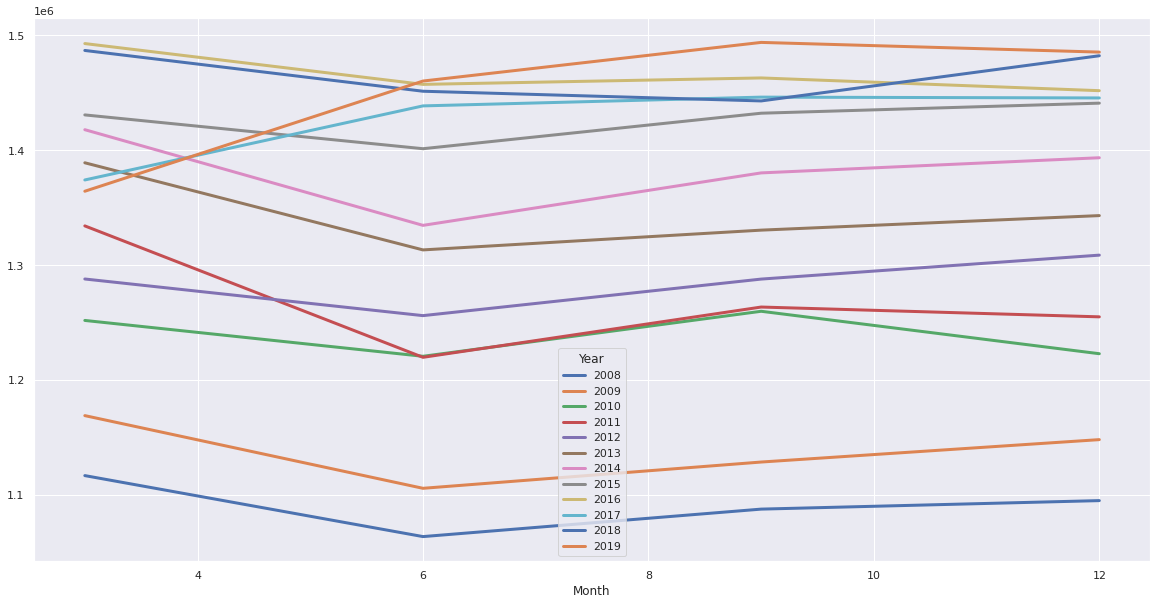

In [28]:
sns.set()
season = df

spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'Admissions', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()

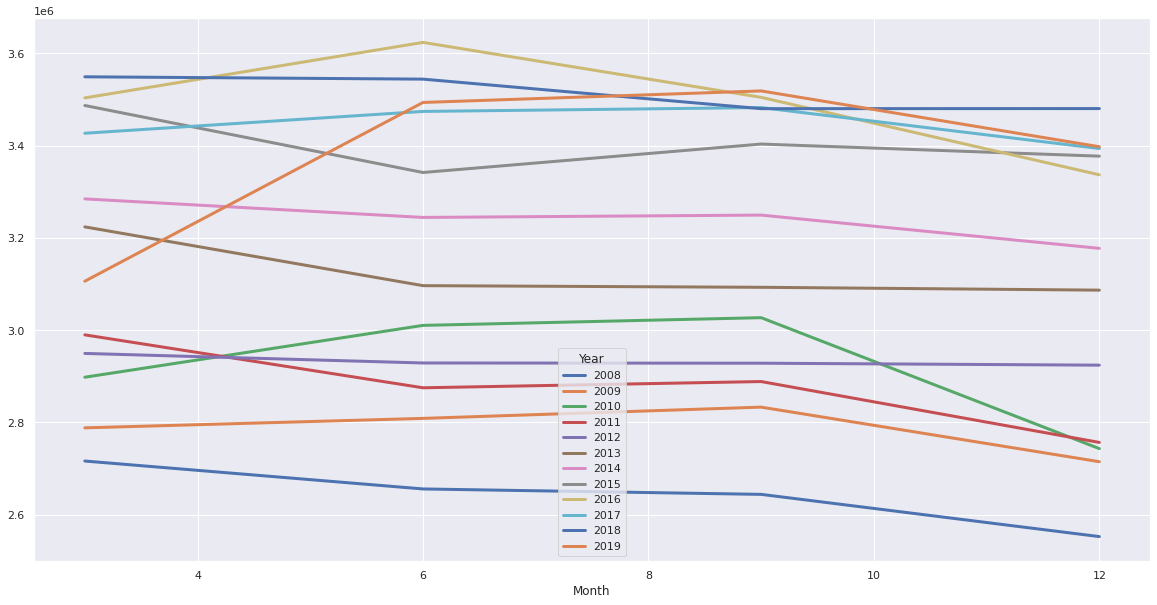

In [29]:
sns.set()
season = df

spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'GP Referrals Made', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()

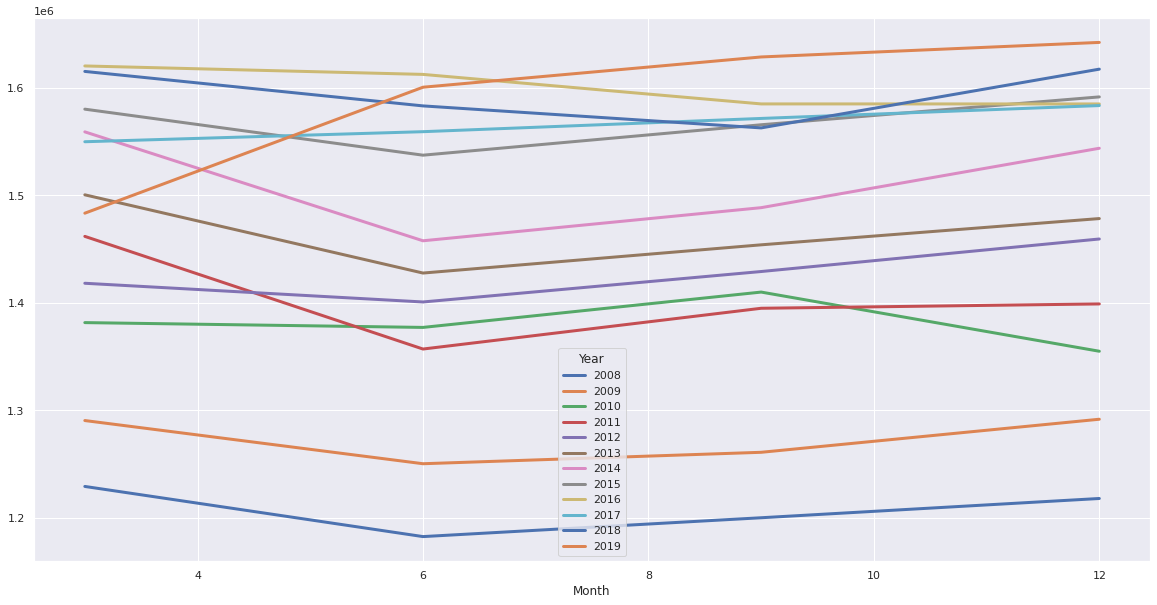

In [30]:
sns.set()
season = df

spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'Decisions to Admit', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()

In [31]:
corr = df.corr() #Correlation matrix for CB player
corr

,Year,Month,Day,Decisions to Admit,Admissions,Failed to Attend,Removals,GP Referrals Made,Other Referrals Made,First Attendances Seen,First Attendances DNA,Subsequent Attendances Seen,Subsequent Attendances DNA
Year,1.000000e+00,-8.712869e-15,NaN,0.920794,0.926590,0.929305,0.958829,0.914716,0.981176,0.966125,0.920796,0.962691,-0.626028
Month,-8.712869e-15,1.000000e+00,NaN,0.031076,0.012109,0.078564,-0.113385,-0.092125,-0.033844,0.046472,0.211972,-0.048129,0.038371
Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Decisions to Admit,9.207937e-01,3.107597e-02,NaN,1.000000,0.994284,0.845805,0.943308,0.943716,0.923613,0.967416,0.888752,0.978634,-0.490264
Admissions,9.265902e-01,1.210939e-02,NaN,0.994284,1.000000,0.852577,0.952725,0.946619,0.926590,0.966281,0.888015,0.982654,-0.499132
Failed to Attend,9.293047e-01,7.856449e-02,NaN,0.845805,0.852577,1.000000,0.885196,0.884664,0.921176,0.934451,0.943435,0.886997,-0.422426
Removals,9.588285e-01,-1.133850e-01,NaN,0.943308,0.952725,0.885196,1.000000,0.919499,0.938251,0.954433,0.891162,0.973431,-0.533112
GP Referrals Made,9.147159e-01,-9.212455e-02,NaN,0.943716,0.946619,0.884664,0.919499,1.000000,0.910379,0.952810,0.894756,0.950498,-0.406166
Other Referrals Made,9.811764e-01,-3.384406e-02,NaN,0.923613,0.926590,0.921176,0.938251,0.910379,1.000000,0.967482,0.895290,0.958160,-0.626328
First Attendances Seen,9.661251e-01,4.647179e-02,NaN,0.967416,0.966281,0.934451,0.954433,0.952810,0.967482,1.000000,0.954806,0.980844,-0.484500


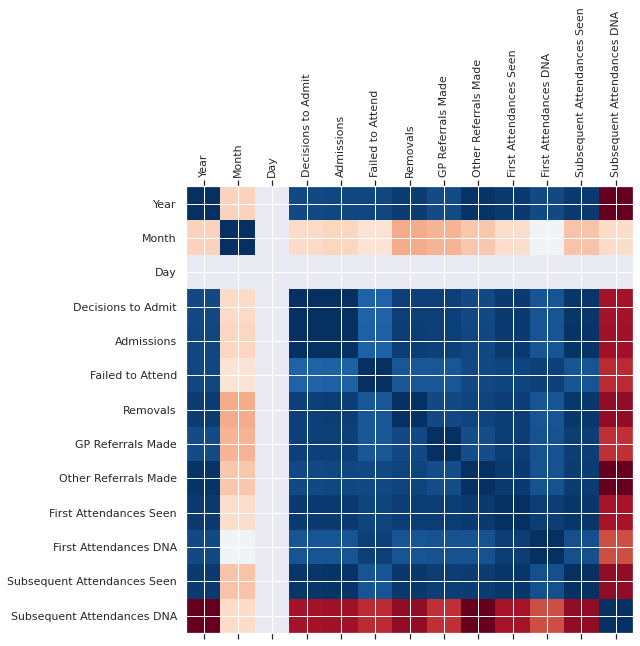

In [32]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [33]:
df2=df.drop(['Subsequent Attendances DNA'], axis = 1)
corr2 = df2.corr() 
corr2

,Year,Month,Day,Decisions to Admit,Admissions,Failed to Attend,Removals,GP Referrals Made,Other Referrals Made,First Attendances Seen,First Attendances DNA,Subsequent Attendances Seen
Year,1.000000e+00,-8.712869e-15,NaN,0.920794,0.926590,0.929305,0.958829,0.914716,0.981176,0.966125,0.920796,0.962691
Month,-8.712869e-15,1.000000e+00,NaN,0.031076,0.012109,0.078564,-0.113385,-0.092125,-0.033844,0.046472,0.211972,-0.048129
Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Decisions to Admit,9.207937e-01,3.107597e-02,NaN,1.000000,0.994284,0.845805,0.943308,0.943716,0.923613,0.967416,0.888752,0.978634
Admissions,9.265902e-01,1.210939e-02,NaN,0.994284,1.000000,0.852577,0.952725,0.946619,0.926590,0.966281,0.888015,0.982654
Failed to Attend,9.293047e-01,7.856449e-02,NaN,0.845805,0.852577,1.000000,0.885196,0.884664,0.921176,0.934451,0.943435,0.886997
Removals,9.588285e-01,-1.133850e-01,NaN,0.943308,0.952725,0.885196,1.000000,0.919499,0.938251,0.954433,0.891162,0.973431
GP Referrals Made,9.147159e-01,-9.212455e-02,NaN,0.943716,0.946619,0.884664,0.919499,1.000000,0.910379,0.952810,0.894756,0.950498
Other Referrals Made,9.811764e-01,-3.384406e-02,NaN,0.923613,0.926590,0.921176,0.938251,0.910379,1.000000,0.967482,0.895290,0.958160
First Attendances Seen,9.661251e-01,4.647179e-02,NaN,0.967416,0.966281,0.934451,0.954433,0.952810,0.967482,1.000000,0.954806,0.980844


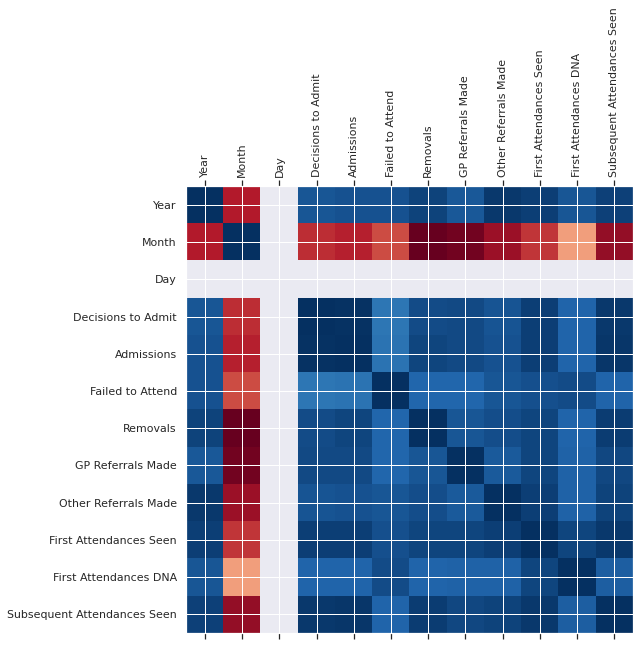

In [34]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr2, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr2.columns)), corr2.columns, rotation='vertical');
plt.yticks(range(len(corr2.columns)), corr2.columns);

In [35]:
df2bis=df2.drop(['Day','Month'], axis = 1)
corr2bis = df2bis.corr() 
corr2bis

,Year,Decisions to Admit,Admissions,Failed to Attend,Removals,GP Referrals Made,Other Referrals Made,First Attendances Seen,First Attendances DNA,Subsequent Attendances Seen
Year,1.000000,0.920794,0.926590,0.929305,0.958829,0.914716,0.981176,0.966125,0.920796,0.962691
Decisions to Admit,0.920794,1.000000,0.994284,0.845805,0.943308,0.943716,0.923613,0.967416,0.888752,0.978634
Admissions,0.926590,0.994284,1.000000,0.852577,0.952725,0.946619,0.926590,0.966281,0.888015,0.982654
Failed to Attend,0.929305,0.845805,0.852577,1.000000,0.885196,0.884664,0.921176,0.934451,0.943435,0.886997
Removals,0.958829,0.943308,0.952725,0.885196,1.000000,0.919499,0.938251,0.954433,0.891162,0.973431
GP Referrals Made,0.914716,0.943716,0.946619,0.884664,0.919499,1.000000,0.910379,0.952810,0.894756,0.950498
Other Referrals Made,0.981176,0.923613,0.926590,0.921176,0.938251,0.910379,1.000000,0.967482,0.895290,0.958160
First Attendances Seen,0.966125,0.967416,0.966281,0.934451,0.954433,0.952810,0.967482,1.000000,0.954806,0.980844
First Attendances DNA,0.920796,0.888752,0.888015,0.943435,0.891162,0.894756,0.895290,0.954806,1.000000,0.903434
Subsequent Attendances Seen,0.962691,0.978634,0.982654,0.886997,0.973431,0.950498,0.958160,0.980844,0.903434,1.000000


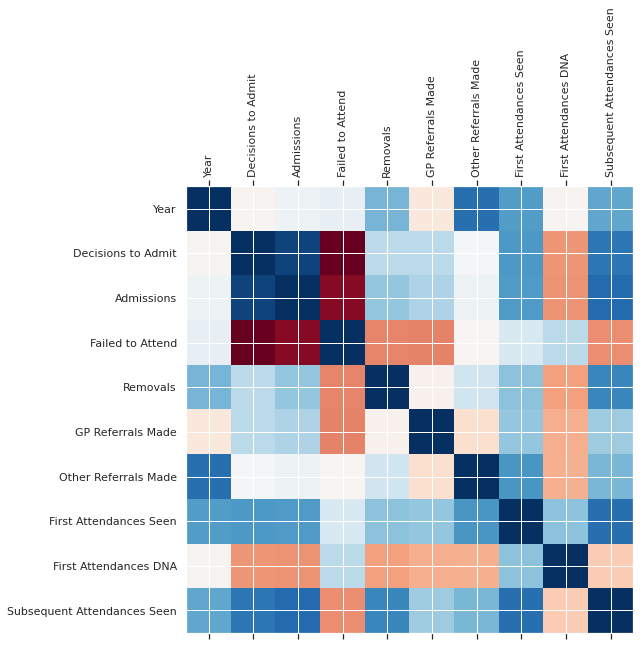

In [36]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr2bis, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr2bis.columns)), corr2bis.columns, rotation='vertical');
plt.yticks(range(len(corr2bis.columns)), corr2bis.columns);

<ipython-input-37-1ee92b63c61a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  admissionsplt = df.groupby('date')['date','Admissions'].mean().dropna()


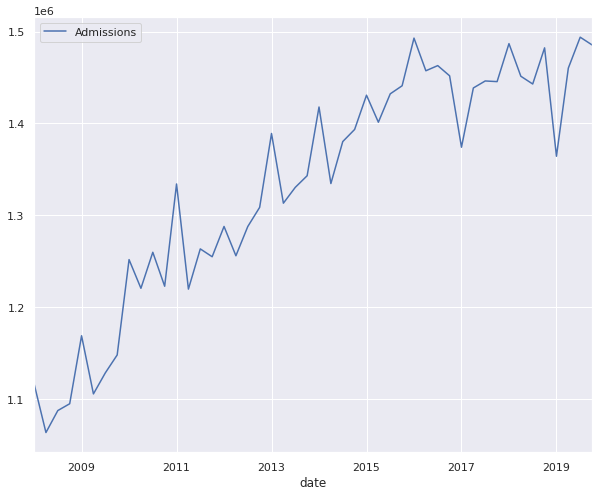

In [37]:
admissionsplt = df.groupby('date')['date','Admissions'].mean().dropna()
admissionsplt.plot(figsize=(10,8))
plt.show()

In [38]:
df3 = df[['date', 'Admissions']]
df3.head()

,date,Admissions
3,2008-03-01,1116562
0,2008-06-01,1063433
1,2008-09-01,1087367
2,2008-12-01,1094776
7,2009-03-01,1168811


In [39]:
df3.set_index('date', inplace=True, drop=True)

In [40]:
df3.index = pd.to_datetime(df3.index)

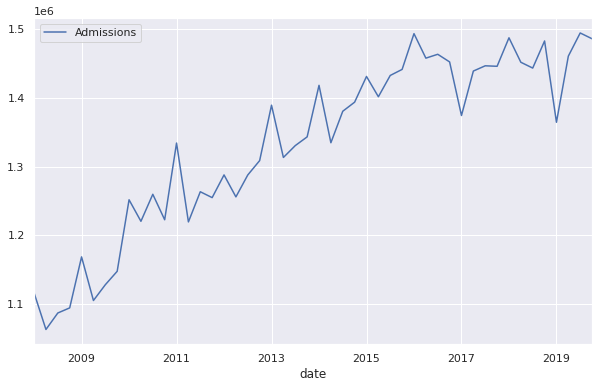

In [41]:
df3.plot()

In [42]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Admissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [43]:
df3=df3.sort_values(by = 'date', ascending = True)

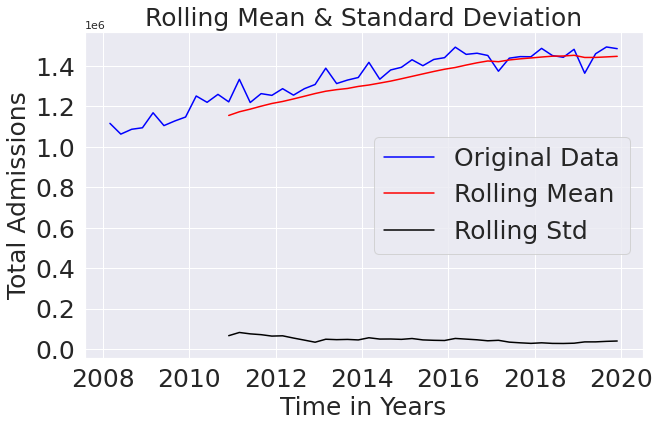

In [44]:
TestStationaryPlot(df3)

In [45]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [46]:
TestStationaryAdfuller(df3)

Test Statistic                 -3.632186
p-value                         0.005175
#Lags Used                      7.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


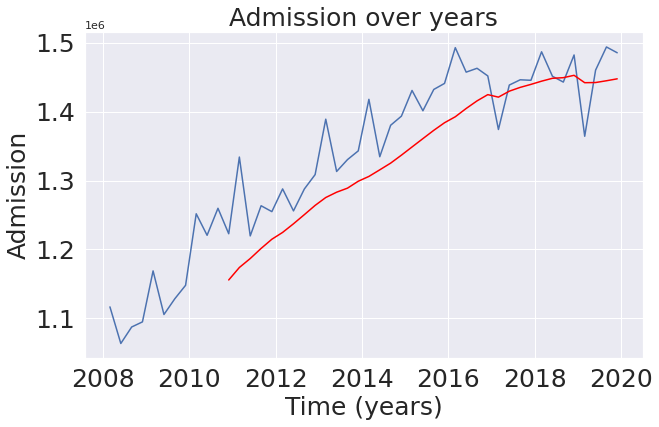

In [47]:
moving_avg = df3.rolling(12).mean()
plt.plot(df3)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('Admission', fontsize = 25)
plt.title('Admission over years', fontsize = 25)
plt.show()

In [48]:
df3_moving_avg_diff = df3 - moving_avg
df3_moving_avg_diff.head(13)

,Admissions
date,
2008-03-01,NaN
2008-06-01,NaN
2008-09-01,NaN
2008-12-01,NaN
2009-03-01,NaN
2009-06-01,NaN
2009-09-01,NaN
2009-12-01,NaN
2010-03-01,NaN


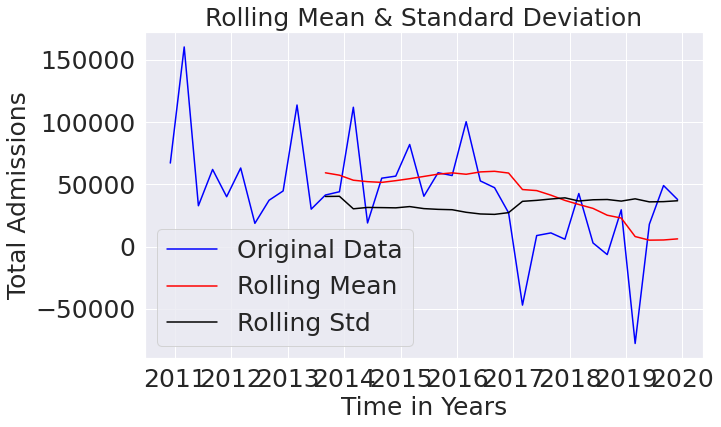

In [49]:
df3_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(df3_moving_avg_diff)

In [50]:
TestStationaryAdfuller(df3_moving_avg_diff)

Test Statistic                 -4.663272
p-value                         0.000099
#Lags Used                      0.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


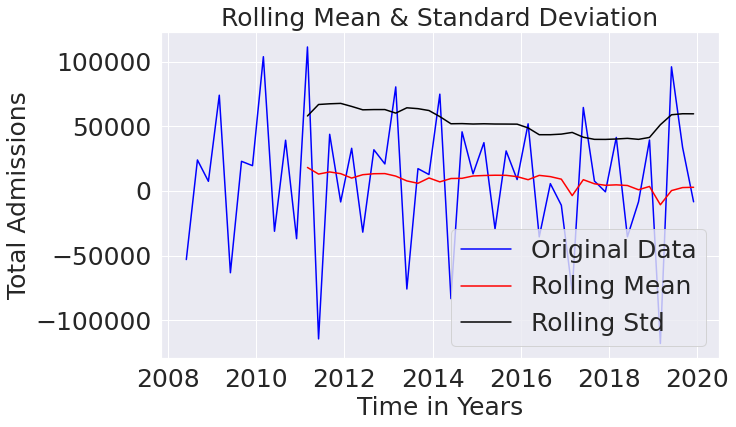

In [51]:
df3_first_difference = df3 - df3.shift(1)  
TestStationaryPlot(df3_first_difference.dropna(inplace=False))

In [52]:
TestStationaryAdfuller(df3_first_difference.dropna(inplace=False))

Test Statistic                 -2.349086
p-value                         0.156625
#Lags Used                      7.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


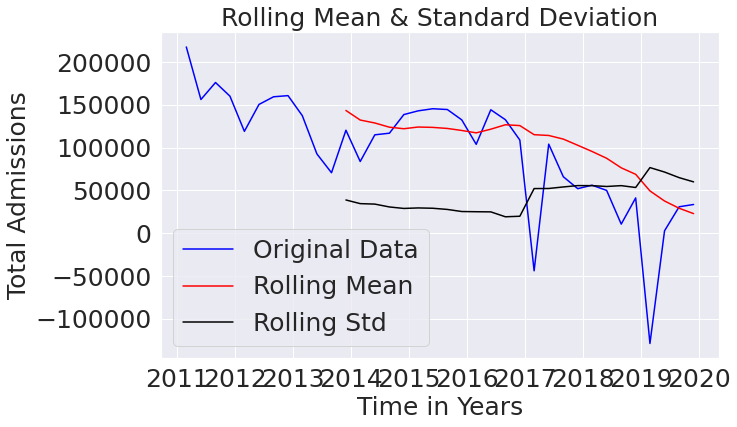

Test Statistic                 -1.780257
p-value                         0.390307
#Lags Used                      1.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [53]:
df3_seasonal_difference = df3 - df3.shift(12)  
TestStationaryPlot(df3_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(df3_seasonal_difference.dropna(inplace=False))

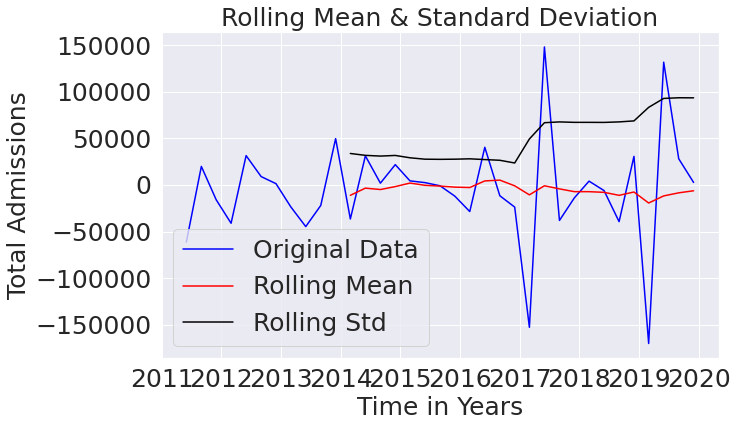

In [54]:
df3_seasonal_first_difference = df3_first_difference - df3_first_difference.shift(12)  
TestStationaryPlot(df3_seasonal_first_difference.dropna(inplace=False))

In [55]:
TestStationaryAdfuller(df3_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -9.666897e+00
p-value                        1.307909e-16
#Lags Used                     0.000000e+00
Number of Observations Used    3.400000e+01
Critical Value (1%)           -3.639224e+00
Critical Value (5%)           -2.951230e+00
Critical Value (10%)          -2.614447e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


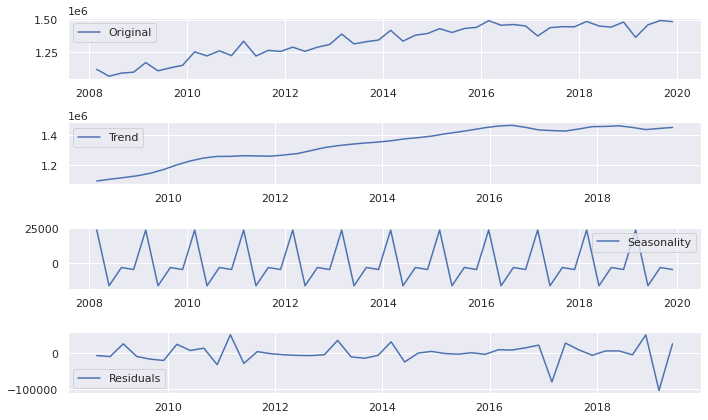

In [56]:
decomposition = seasonal_decompose(df3)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df3, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

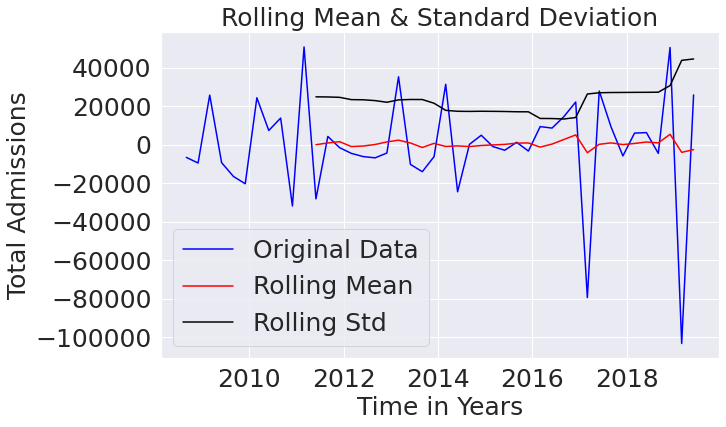

Test Statistic                -6.176601e+00
p-value                        6.607474e-08
#Lags Used                     6.000000e+00
Number of Observations Used    3.700000e+01
Critical Value (1%)           -3.620918e+00
Critical Value (5%)           -2.943539e+00
Critical Value (10%)          -2.610400e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [57]:
df3_decompose = residual
df3_decompose.dropna(inplace=True)
TestStationaryPlot(df3_decompose)
TestStationaryAdfuller(df3_decompose)

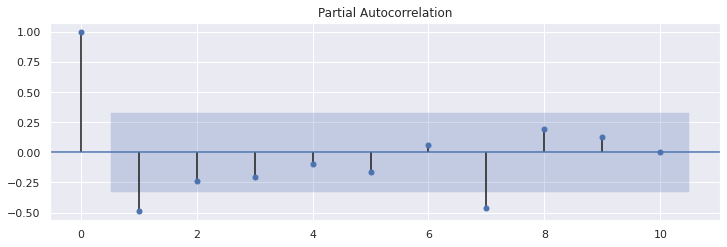

In [66]:
fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(df3_seasonal_first_difference.iloc[13:], lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df3_seasonal_first_difference.iloc[13:], lags=10, ax=ax2)

In [67]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [68]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [69]:
mod = sm.tsa.statespace.SARIMAX(df3, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Admissions   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -260.158
Date:                            Sat, 21 Jan 2023   AIC                            528.317
Time:                                    12:09:26   BIC                            532.495
Sample:                                03-01-2008   HQIC                           529.224
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0875      0.375     -0.233      0.816      -0.823       0.648
ma.L1         -0.6010      0.275   

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


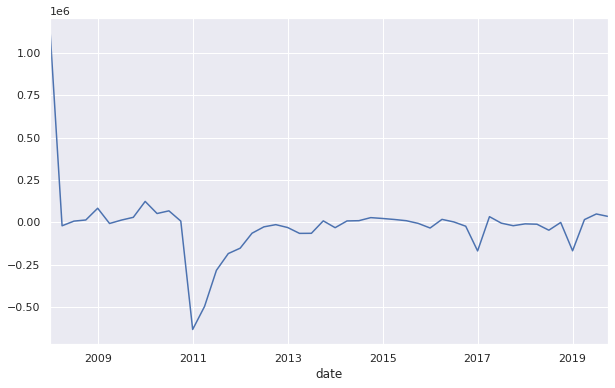

In [70]:
results.resid.plot()

In [71]:
print(results.resid.describe())

count    4.800000e+01
mean    -1.671161e+04
std      2.129664e+05
min     -6.320630e+05
25%     -3.222725e+04
50%     -3.059438e+03
75%      1.673565e+04
max      1.116562e+06
dtype: float64


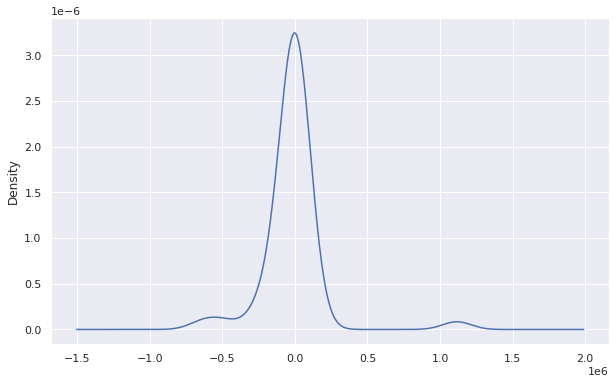

In [72]:
results.resid.plot(kind='kde')

In [91]:
pred = results.get_prediction(start = 40, end = 50, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Admissions,upper Admissions
2018-03-01,1.398244e+06,1.594001e+06
2018-06-01,1.364733e+06,1.560490e+06
2018-09-01,1.391701e+06,1.587459e+06
2018-12-01,1.385387e+06,1.581145e+06
2019-03-01,1.434431e+06,1.630189e+06


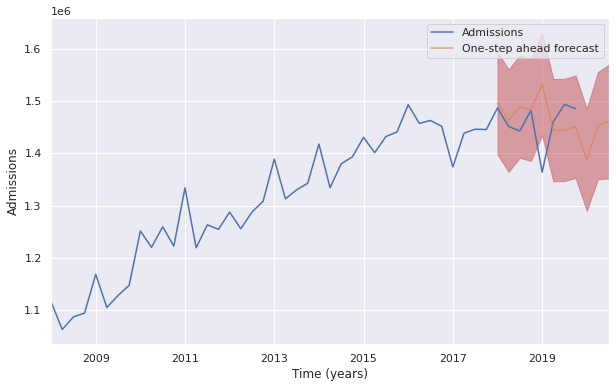

In [92]:
ax = df3['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Admissions')
plt.legend()

plt.show()

In [93]:
df3_forecast = pred.predicted_mean
df3_truth = df3['2018-03-01':]

In [94]:
df3_pred_concat = pd.concat([df3_truth, df3_forecast])

In [95]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2018-03-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


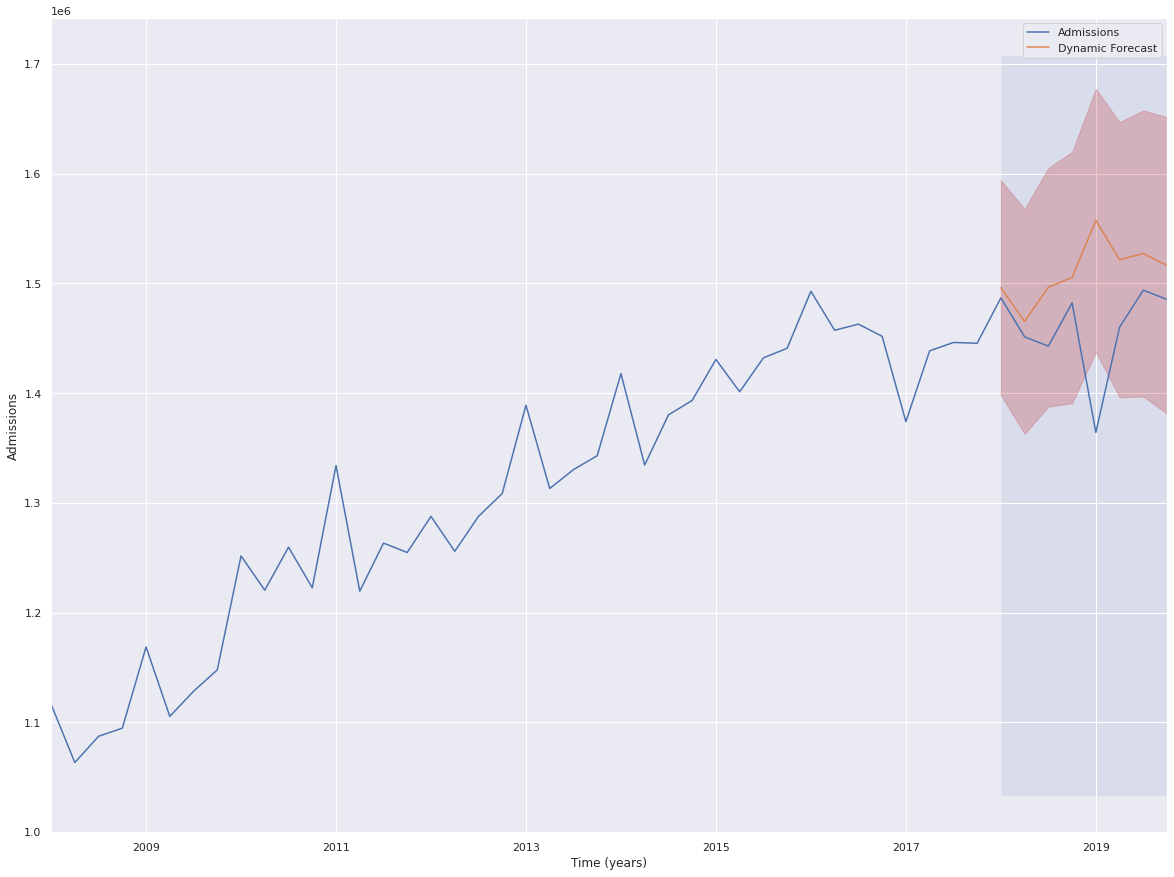

In [96]:
ax = df3['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2018-03-01'), 
                 df3.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Admissions')

plt.legend()
plt.show()

In [97]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 12)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower Admissions,upper Admissions
2020-03-01,1.290011e+06,1.485769e+06
2020-06-01,1.350643e+06,1.555681e+06
2020-09-01,1.352124e+06,1.569696e+06
2020-12-01,1.345762e+06,1.574859e+06
2021-03-01,1.381599e+06,1.621695e+06


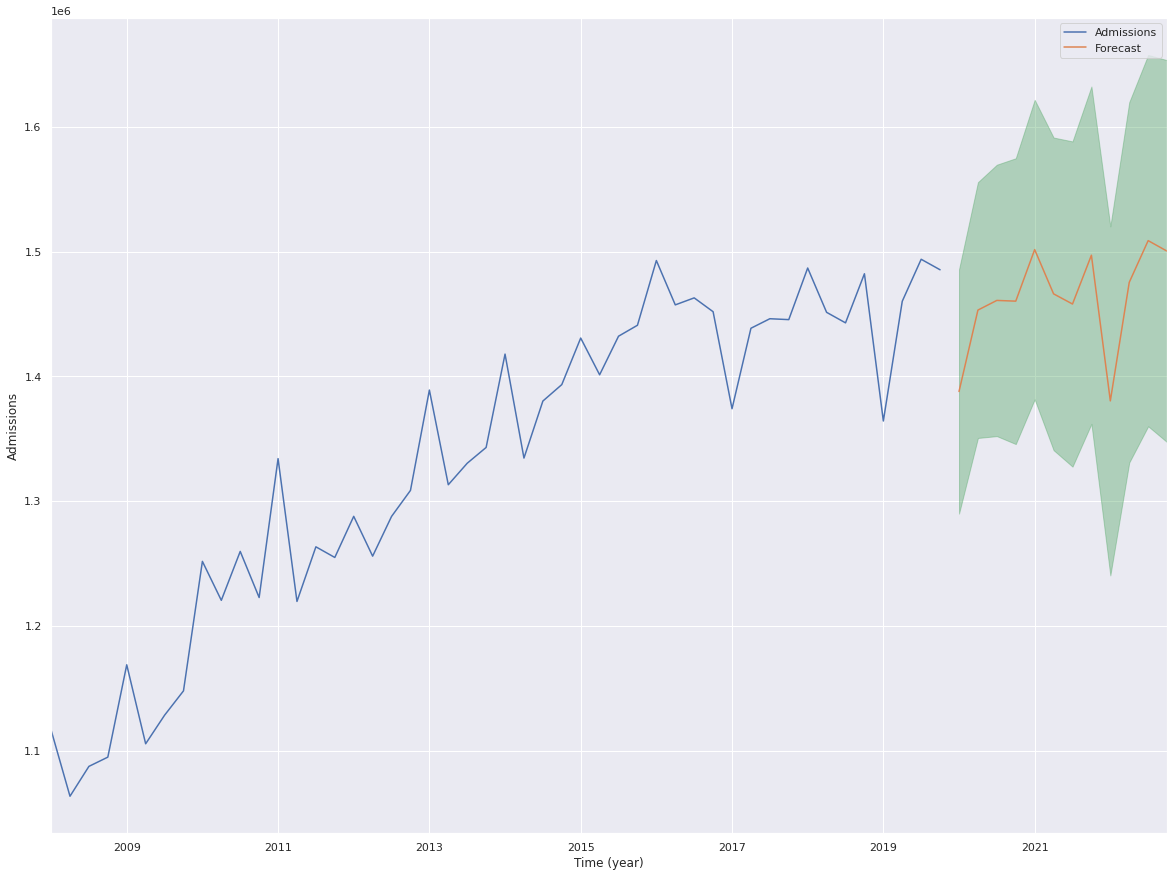

In [98]:
ax = df3.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('Admissions')

plt.legend()
plt.show()

In [99]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 45)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.tail()

,lower Admissions,upper Admissions
2030-03-01,936332.896430,2.157405e+06
2030-06-01,884364.789183,2.138426e+06
2030-09-01,860138.024138,2.146342e+06
2030-12-01,883594.380171,2.201158e+06
2031-03-01,751488.363699,2.099682e+06


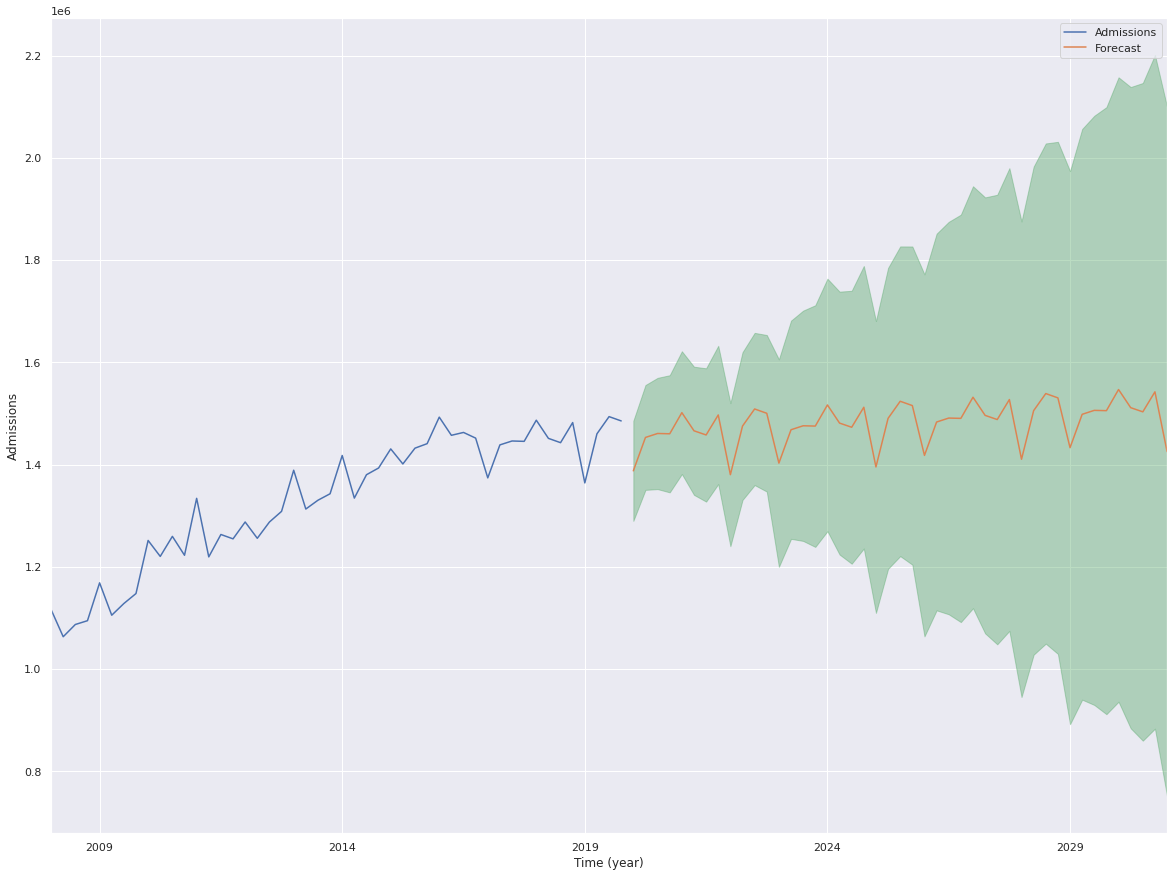

In [100]:
ax = df3.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('Admissions')

plt.legend()
plt.show()